In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Getting the coefficients from: 
$$
0 = 8y^3 - 42y+25
$$

In [255]:
coeff = [8,0, -42, 25]
roots = np.roots(coeff)
roots

array([-2.54515663,  1.89838443,  0.6467722 ])

Removing the negative because it will create a NaN and is not a critical point because it cannot be solved.

In [256]:
roots = roots[1:]
roots

array([1.89838443, 0.6467722 ])

Solving for the x-coordinates using:

$$

x = \pm \sqrt{\frac{10y-5}{2}}
$$

In [257]:
pos_f = np.sqrt((10*roots -5)/2)

neg_f = -1* pos_f

In [258]:
pos_f

array([2.6442243 , 0.85665687])

In [259]:
neg_f

array([-2.6442243 , -0.85665687])

Organizing the solved x and y coordinates

In [260]:

y = np.concatenate((roots, roots, np.array([0])))
y

array([1.89838443, 0.6467722 , 1.89838443, 0.6467722 , 0.        ])

In [261]:
x = np.concatenate((pos_f, neg_f, np.array([0])))
x

array([ 2.6442243 ,  0.85665687, -2.6442243 , -0.85665687,  0.        ])

Inputting the critical points into

$$
f(x,y) = 10x^{2}y-5x^2 -4y^2 - x^4 - 2y^4
$$

In [262]:
func = 10*x**2*y - 5*x**2 - 4*y**2 - x**4 - 2*y**4
func


array([ 8.49585813, -1.48467882,  8.49585813, -1.48467882,  0.        ])

Solving for the Second Derivative test by taking

$$
det(\nabla ^2 f)
$$

In [263]:
d_x_y = (20*y - 10 - 12 * x**2)*(-24*y**2 - 8)  - (20*x)**2
d_x_y

array([2488.7172337 , -187.63626429, 2488.7172337 , -187.63626429,
         80.        ])

Solving for 
$$
f_{xx}
$$

In [264]:
f_xx = (20*y - 10 - 12 * x**2)
f_xx

array([-55.93537725,  -5.87088796, -55.93537725,  -5.87088796,
       -10.        ])

In [265]:
crit = pd.DataFrame()
crit["x"] = x
crit["y"] = y
crit["f(x,y)"] = func
crit["D(x,y)"] = d_x_y
crit["f_xx"] = f_xx

crit

,x,y,"f(x,y)","D(x,y)",f_xx
0,2.644224,1.898384,8.495858,2488.717234,-55.935377
1,0.856657,0.646772,-1.484679,-187.636264,-5.870888
2,-2.644224,1.898384,8.495858,2488.717234,-55.935377
3,-0.856657,0.646772,-1.484679,-187.636264,-5.870888
4,0.000000,0.000000,0.000000,80.000000,-10.000000


In [266]:
def classify(row: pd.DataFrame):
    if row["D(x,y)"] < 0:
        return "saddle"
    elif row["D(x,y)"] == 0:
        return "unknown"
    else:
        if row["f_xx"] > 0:
            return "minimum"
        else:
            return "maximum"
        
        
crit["classification"] = crit.apply(classify, axis = 1)
crit

,x,y,"f(x,y)","D(x,y)",f_xx,classification
0,2.644224,1.898384,8.495858,2488.717234,-55.935377,maximum
1,0.856657,0.646772,-1.484679,-187.636264,-5.870888,saddle
2,-2.644224,1.898384,8.495858,2488.717234,-55.935377,maximum
3,-0.856657,0.646772,-1.484679,-187.636264,-5.870888,saddle
4,0.000000,0.000000,0.000000,80.000000,-10.000000,maximum


B) Plotting the contour

In [267]:
delta = 0.025
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z = 10*X**2*Y - 5*X**2 - 4*Y**2 - X**4 - 2*Y**4

levels = np.arange(-4,10, 0.2)


(-1.0, 3.0)

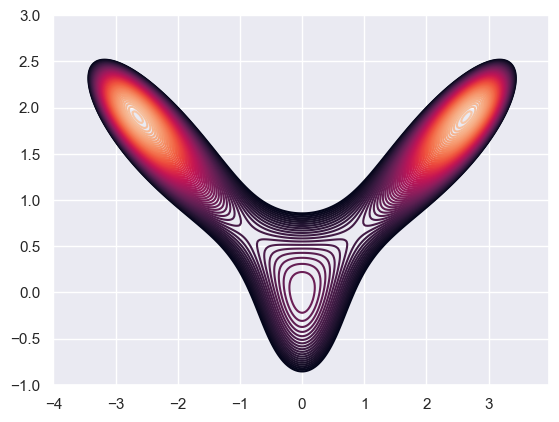

In [268]:
sns.set_theme()
plt.contour(X,Y,Z, levels = levels)
plt.ylim(-1, 3)